<div align='center'> <h1>Hypothesis Testing</h1></div>
<div align='center'> <h3>Problem Statement</h3></div>


Frank’s Supervisor, Dr. Brown, holds expertise in both mathematical statistics and medical science. He assigned Frank the task of estimating the average reimbursement amount for dental claims in 2021. Due to Healthy Life's extensive client base, calculating the population mean directly is impractical. To tackle this challenge, Frank utilized the Excel Random Number Generator function to obtain a random sample of 49 dental claims from Healthy Life's records. The data provided in the Major Data file section represents the insurance coverage amounts for these selected claims. Please help Frank to construct 90%, 95%, and 99% confidence intervals for the true average reimbursement. Make sure that t-distribution is applicable: build a histogram with the given bin values and check whether it is approximately symmetric and bell-shaped. Then, use Descriptive Statistics function from Data Analysis. Constructing confidence intervals, please round values to at least two decimal places.

In [45]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for hypothesis testing
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

In [17]:
# Loading Dataset

df=pd.read_excel(r'Major Data File.xlsx')
df.head(3)

,,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Dental Claim Number,Amount Covered
2,NaN,1,375.5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0               0 non-null      float64
 1   Unnamed: 1  50 non-null     object 
 2   Unnamed: 2  50 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [21]:
# Selecting only required column
df = df[['Unnamed: 2']]
df.head()

,Unnamed: 2
0,NaN
1,Amount Covered
2,375.5
3,380
4,192.75


In [23]:
# Renaming column name and dropping unnecessay columns and rows

df.rename(columns={'Unnamed: 2':'Amount Covered'},inplace=True)
df.drop([0,1],axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Amount Covered
0,375.5
1,380
2,192.75
3,400
4,230


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Amount Covered  49 non-null     object
dtypes: object(1)
memory usage: 524.0+ bytes


In [27]:
# Changing the data type of Amount Covered so aggregation can be performed on Amount Covered Column

df['Amount Covered'] = df['Amount Covered'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Amount Covered  49 non-null     float64
dtypes: float64(1)
memory usage: 524.0 bytes


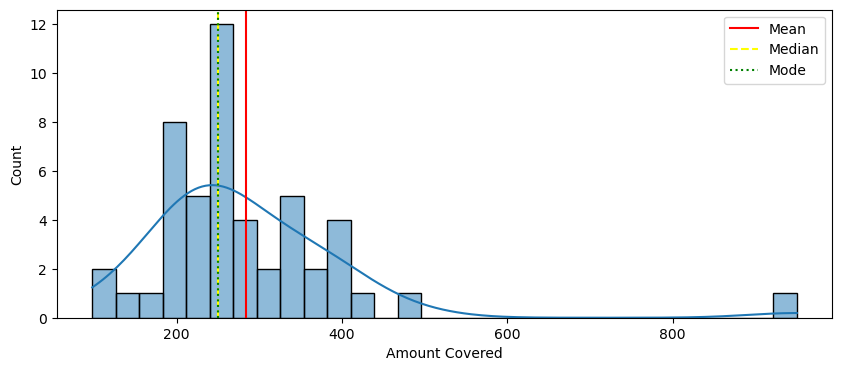

In [29]:
# Plotting amount distribution along with mean median mode value

f,ax = plt.subplots(figsize=(10,4))
sns.histplot(df['Amount Covered'],bins=30,kde=True,ax=ax)
ax.axvline(df['Amount Covered'].mean(),color='red',label ='Mean')
ax.axvline(df['Amount Covered'].median(),color='yellow',linestyle='--',label ='Median')
ax.axvline(df['Amount Covered'].mode()[0],color='green',linestyle=':',label ='Mode')
ax.legend()
plt.show()

**As we can see there are some outliers in data**

In [32]:
# Statistics of amount covered

df['Amount Covered'].describe()

count     49.000000
mean     283.540816
std      128.829530
min       98.000000
25%      225.000000
50%      250.000000
75%      340.000000
max      950.000000
Name: Amount Covered, dtype: float64

##### Outlier Handling

In [47]:
# fetching mean std 25% 50% 75% using describe function
mean=df['Amount Covered'].describe()[1]
std=df['Amount Covered'].describe()[2]
Q1=df['Amount Covered'].describe()[4]
Q2=df['Amount Covered'].describe()[5]
Q3=df['Amount Covered'].describe()[6]

print('mean',mean)
print('std',std)
print('Q1',Q1)
print('Q2',Q2)
print('Q3',Q3)

# Calculating Interquatile range
IQR = Q3-Q1
print('IQR',IQR)

# Calculating upper and lower limit of amount covered
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(f"lower limit : {lower_limit}\nupper limit : {upper_limit}")

mean 269.65625
std 85.45708804000166
Q1 220.0
Q2 250.0
Q3 340.0
IQR 120.0
lower limit : 40.0
upper limit : 520.0


In [37]:
# fetching data within upper and lower limit 
df = df[(df['Amount Covered']>lower_limit) & (df['Amount Covered']<upper_limit)]
df.head()

,Amount Covered
0,375.50
1,380.00
2,192.75
3,400.00
4,230.00


#### Hypothesis Testing


**H0 :** The true average reimbursement amount of dental claims is equal to specific value.

**H1 :** The true average reimbursement amount of dental claims is **not** equal to specific value.

In [41]:
CI=[0.9,0.95,0.99]
mean=df['Amount Covered'].mean()
alpha=[]
for i in CI:
    a=1-i
    alpha.append(np.round(a,2))
print('alpha value :',alpha)

# calculating pvalue using t-test(one sample test)
statistics_value,pvalue=st.ttest_1samp(df['Amount Covered'],mean)
print('statistics_value :' ,statistics_value)
print(f"p-value : {pvalue}\n")

# Checking for different value of alpha
for i in alpha:
    print('alpha :',i)
    if pvalue< i:
            print("WE REJECT THE NULL HYPOTHESIS\n")
    else:
        print("WE FAILED TO REJECT THE NULL HYPOTHESIS\n")

alpha value : [0.1, 0.05, 0.01]
statistics_value : 0.0
p-value : 1.0

alpha : 0.1
WE FAILED TO REJECT THE NULL HYPOTHESIS

alpha : 0.05
WE FAILED TO REJECT THE NULL HYPOTHESIS

alpha : 0.01
WE FAILED TO REJECT THE NULL HYPOTHESIS



**As we failed to reject the Null Hypthesis that mean -> The true average reimbursement amount of dental claims is equal to specific value.**

In [55]:

# Calculating mean and std 
mean = np.mean(df)
std_dev = np.std(df, ddof=1)  # Sample standard deviation
n = len(df)

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}\n")

# Calculating t-critical values for confidence intervals -> 90%, 95%, and 99%
confidence_levels = [0.90, 0.95, 0.99]

for confidence in confidence_levels:
    alpha = 1 - confidence
    t_critical = st.t.ppf(1 - alpha / 2, df=n-1)  # t-critical value
    print('t-critical value : ',t_critical)
    margin_of_error = t_critical * (std_dev / np.sqrt(n))
    
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    
    print(f"{int(confidence*100)}% Confidence Interval: ({lower_bound.iloc[0]:.2f}, {upper_bound.iloc[0]:.2f})\n")



Mean: 269.65625
Standard Deviation: Amount Covered    85.457088
dtype: float64

t-critical value :  1.6779267216418605
90% Confidence Interval: (248.96, 290.35)

t-critical value :  2.0117405137297655
95% Confidence Interval: (244.84, 294.47)

t-critical value :  2.6845556178665215
99% Confidence Interval: (236.54, 302.77)



##### For higher certainty (e.g. 99%) is required, to get a wider interval, knowing that the population mean is more likely to fall within this range.

##### For more precise interval (e.g. 90%) is acceptable, for narrower range but with slightly less confidence.